# PROYECTO FINAL DATA SCIENCE: CLASIFICACIÓN ESTELAR

Alumno:

* Lucas Gauto

El siguiente es un documento donde se condensa todo el código utilizado para la elaboración del informe final.
Todos los pasos seguidos aquí, así como un análisis de los datos y los resultados, se encuentran explicados en dicho informe.

## Parte 1: Análisis de Datos

In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# DF
df = pd.read_csv("Estrellas.csv")
df.head(15)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [3]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
# Cuántos datos tengo?
df.shape

(10000, 18)

In [5]:
# Me fijo que no haya nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
#Quiero ver detalles del df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,10000.0,1.237650e+18,1.577039e+05,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18
ra,10000.0,1.755300e+02,4.778344e+01,8.235100e+00,1.573709e+02,1.803945e+02,2.015473e+02,2.608844e+02
dec,10000.0,1.483615e+01,2.521221e+01,-5.382632e+00,-5.390350e-01,4.041660e-01,3.564940e+01,6.854227e+01
u,10000.0,1.861936e+01,8.286560e-01,1.298897e+01,1.817804e+01,1.885309e+01,1.925923e+01,1.959990e+01
g,10000.0,1.737193e+01,9.454572e-01,1.279955e+01,1.681510e+01,1.749513e+01,1.801015e+01,1.991897e+01
r,10000.0,1.684096e+01,1.067764e+00,1.243160e+01,1.617333e+01,1.685877e+01,1.751268e+01,2.480204e+01
i,10000.0,1.658358e+01,1.141805e+00,1.194721e+01,1.585370e+01,1.655499e+01,1.725855e+01,2.817963e+01
z,10000.0,1.642283e+01,1.203188e+00,1.161041e+01,1.561829e+01,1.638995e+01,1.714145e+01,2.283306e+01
run,10000.0,9.810348e+02,2.733050e+02,3.080000e+02,7.520000e+02,7.560000e+02,1.331000e+03,1.412000e+03
rerun,10000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [7]:
#Creo una copia del df sin columnas que no me sirvan
dfclean = df.drop(["objid", "specobjid", "run", "rerun", "camcol", "field"], axis=1) #estas colmns no me sirven
dfclean.head(15)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,GALAXY,0.040508,288,52000,400


In [8]:
#Me fijo que no haya nada más q las 3 clases que decía que tenía el dataset.
dfclean["class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

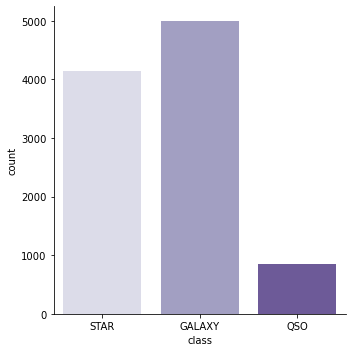

In [9]:
#Gráfico: cantidad de objetos que tengo, según su clase
sns.catplot(x="class", kind="count", palette="Purples", data=dfclean);

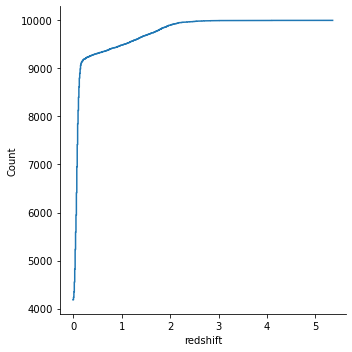

In [10]:
#Gráfico: distribución de valores de la colmuna Redshift
sns.displot(x="redshift", data=dfclean, element="step", cumulative=True, fill=False, common_norm=False)

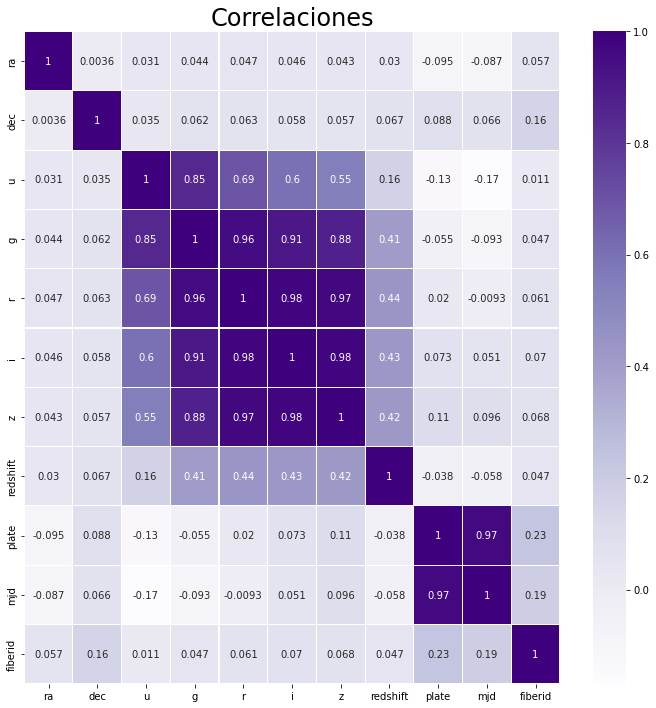

In [11]:
#Mapa de Correlación

plt.figure(figsize=(12, 12))
sns.heatmap(dfclean.corr(), annot = True, linewidths=.1, cmap = 'Purples')
plt.title('Correlaciones', fontsize = 24)
plt.show()

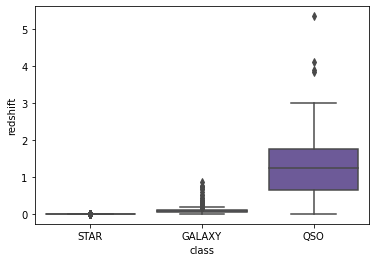

In [12]:
#Gráfico: Redshift según objeto
sns.boxplot( x=dfclean["class"], y=dfclean["redshift"], palette="Purples")

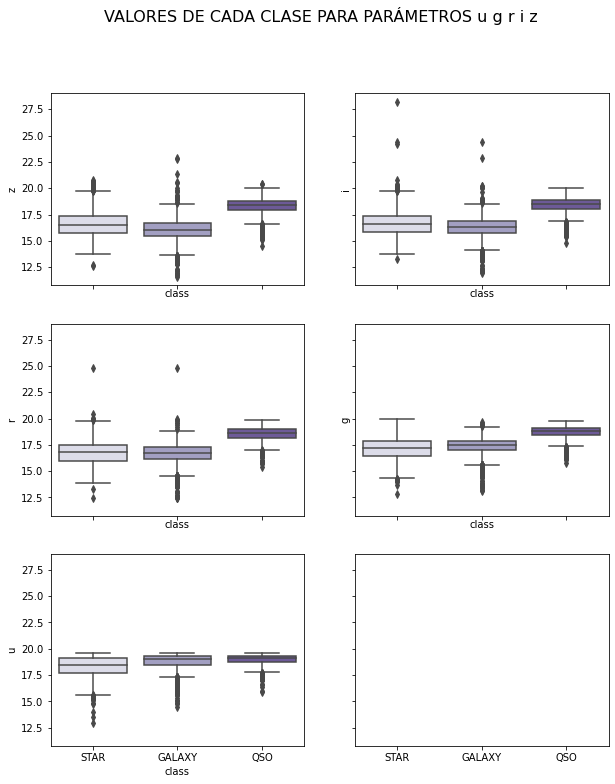

In [13]:
# Gráfico: Boxplots de valores u g r i z para cada clase.

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=True, sharey=True)
fig.suptitle('VALORES DE CADA CLASE PARA PARÁMETROS u g r i z', fontsize=16)
sns.boxplot(ax = ax[0,0], x = "class", y = "z", data = dfclean, palette = "Purples")
sns.boxplot(ax = ax[0,1], x = "class", y = "i", data = dfclean, palette = "Purples")
sns.boxplot(ax = ax[1,0], x = "class", y = "r", data = dfclean, palette = "Purples")
sns.boxplot(ax = ax[1,1], x = "class", y = "g", data = dfclean, palette = "Purples")
sns.boxplot(ax = ax[2,0], x = "class", y = "u", data = dfclean, palette = "Purples")
#No recuerdo cómo borrar el gráfico [2,2]

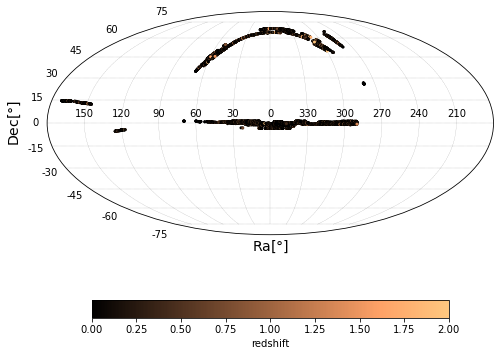

In [14]:
#Gráfico: Coordenadas Ecuatoriales

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='mollweide')
plt.scatter(np.radians(dfclean.ra-180), np.radians(dfclean.dec), marker = '.', c = df.redshift,
            cmap=plt.cm.copper, 
            vmin = 0, vmax = 2.0, 
            linewidths = 0., zorder = 10)
plt.colorbar(orientation = 'horizontal', shrink = 0.8, label='redshift')
plt.grid(color='black', ls=':', linewidth=0.2)

xvalores = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
yvalores = np.array([-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75])
ax.set_xticklabels(xvalores)
ax.set_yticklabels(yvalores)

ax.set_xlabel(r'$\mathrm{Ra[\degree]}$')
ax.xaxis.label.set_fontsize(14)
ax.set_ylabel(r'$\mathrm{Dec[\degree]}$')
ax.yaxis.label.set_fontsize(14)

In [15]:
# Me creo un dataset para cada clase (con redshifts positivos, sin blueshifts)
dfstar = dfclean.loc[(dfclean['class']=="STAR") & (dfclean["redshift"]>0.0)]
dfgalaxy = dfclean.loc[(dfclean['class']=="GALAXY") & (dfclean["redshift"]>0.0)]
dfqso = dfclean.loc[(dfclean['class']=="QSO") & (dfclean["redshift"]>0.0)]

#esto es porque hay que hacerle un logaritmo al redshift y logaritmo de cosas negativas o 0 siempre trae errores.

In [16]:
# Librería que me permite pasar redshift a distancia
from astropy.cosmology import WMAP9 as cosmo

In [17]:
#Detalle de lo que voy a hacer en el gráfico siguiente
print("Distancia según lo tira la función importada:", cosmo.luminosity_distance(dfstar.redshift))
print("Sin la unidad obtengo:", cosmo.luminosity_distance(dfstar.redshift).value)
print("Y aplicándole logaritmo a todo esto:", np.log(cosmo.luminosity_distance(dfstar.redshift).value))

Distancia según lo tira la función importada: [2.55433618 1.3609189  1.36197899 ... 1.47975536 0.09601138 1.36300446] Mpc
Sin la unidad obtengo: [2.55433618 1.3609189  1.36197899 ... 1.47975536 0.09601138 1.36300446]
Y aplicándole logaritmo a todo esto: [ 0.93779238  0.30816013  0.30893878 ...  0.39187678 -2.3432886
  0.30969143]


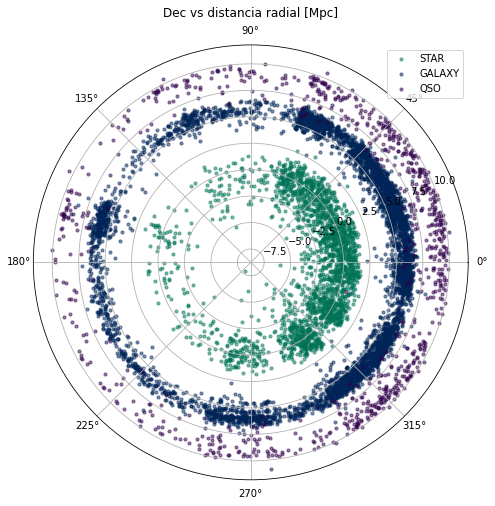

In [18]:
# Gráfico: Coordenadas Polares Dec vs Distancia
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

ax.scatter(dfstar.dec, np.log(cosmo.luminosity_distance(dfstar.redshift).value), s=10, 
           c='#007356', alpha=0.5, label = dfstar['class'].unique()[0])

ax.scatter(dfgalaxy.dec, np.log(cosmo.luminosity_distance(dfgalaxy.redshift).value), marker='o', s=10, 
           c='#002457', alpha = 0.5, label = dfgalaxy['class'].unique()[0])

ax.scatter(dfqso.dec, np.log(cosmo.luminosity_distance(dfqso.redshift).value), marker='o', s=10, 
           c='#30004a', alpha=0.5, label = dfqso['class'].unique()[0])

ax.legend()
plt.title('Dec vs distancia radial [Mpc]')
plt.show()

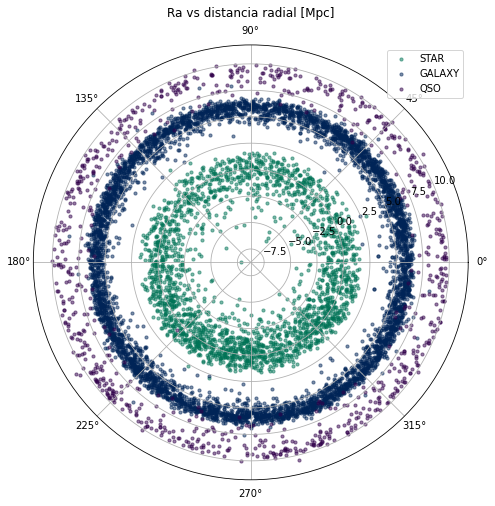

In [19]:
# Gráfico: Coordenadas Polares RA vs Distancia
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

ax.scatter(dfstar.ra, np.log(cosmo.luminosity_distance(dfstar.redshift).value), s=10, 
           c='#007356', alpha=0.5, label = dfstar['class'].unique()[0])

ax.scatter(dfgalaxy.ra, np.log(cosmo.luminosity_distance(dfgalaxy.redshift).value), marker='o', s=10, 
           c='#002457', alpha = 0.5, label = dfgalaxy['class'].unique()[0])

ax.scatter(dfqso.ra, np.log(cosmo.luminosity_distance(dfqso.redshift).value), marker='o', s=10, 
           c='#30004a', alpha=0.5, label = dfqso['class'].unique()[0])

ax.legend()
plt.title('Ra vs distancia radial [Mpc]')
plt.show()

Como dato interesante, me pareció que valía la pena revisar el valor máximo de redshift

In [20]:
#El objeto más lejano
print("Redshift máx: ", dfclean["redshift"].max(), "\nObject Class: ", dfclean[dfclean['redshift'] == dfclean["redshift"].max()]["class"].unique()[0])

Redshift máx:  5.353854 
Object Class:  QSO


In [21]:
#La distancia de este objeto
print("Distancia máx: ", cosmo.luminosity_distance(dfclean["redshift"].max()))


Distancia máx:  51809.22163886522 Mpc


Como para tomar un poco de conciencia de lo que hablamos, ese valor corresponde a una medida en megapársecs (Mpc), es decir en millones de pársecs. Esto corresponde a: <br><br> 
$$1Mpc= 3,26 \,\text{millones de años luz}= 3,0857.10^{22}\, m$$<br><br>

Basado en la distancia a la que se encuentra, el cuásar más lejano emitió la luz que nos llega hoy en día hace aproximadamente casi 13 Gyr (estamos hablando de cuando el Universo tenía aproximadamante un 8% de su "edad" actual).


## Parte 2: ML

Antes de usar modelos de ML, creo una copia del dataset con la columna "class" pasada a valores numéricos.

In [22]:
# Copia del DF
dataset = dfclean

# Función que haga esto. 
def en_numeros(x):
    if x =='STAR':
        return 0
    elif x =='GALAXY':
        return 1
    else:
        return 2

# En el dataset
dataset['class'] = dataset['class'].apply(en_numeros,)

# Me fijo que haya funcionado
dataset.head(15)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,0,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,1,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,0,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,0,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,1,0.040508,288,52000,400


### TREE

In [23]:
# Librerías
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
# Defino variables y target

X = dataset.drop("class", axis=1)
y = dataset["class"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

# Modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [25]:
# Entreno Modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [26]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [27]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('TREE ACCURACY:',test_accuracy)

TREE ACCURACY: 0.9886666666666667


In [28]:
#Confusion Matrix
CM = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión: \n\n', CM)

Matriz de Confusión: 

 [[1215    2    0]
 [   8 1484    5]
 [   0   19  267]]


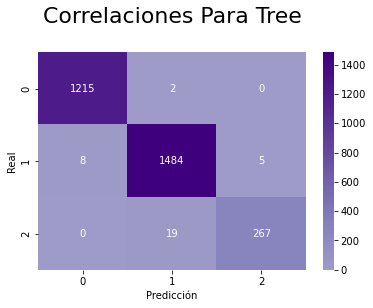

In [29]:
# Gráfico
sns.heatmap(CM, center = True, annot=True, fmt="g", cmap="Purples")
plt.title('Correlaciones Para Tree\n', fontsize = 22)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### RANDOM FOREST

In [30]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
A = dataset.drop(["class"], axis=1)
B = dataset["class"]
(A_train, A_test, B_train, B_test) = train_test_split(A, B, stratify= B, test_size=0.30, random_state=11)

model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced")
model.fit(A_train, B_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=11)

In [32]:
B_test_pred = model.predict(A_test)
test_accuracy = accuracy_score(B_test, B_test_pred)

print('FOREST ACCURACY:',test_accuracy)

FOREST ACCURACY: 0.992


In [33]:
#Confusion Matrix
CM = confusion_matrix(B_test, B_test_pred)
print('Matriz de Confusión: \n\n', CM)

Matriz de Confusión: 

 [[1245    1    0]
 [   8 1487    4]
 [   0   11  244]]


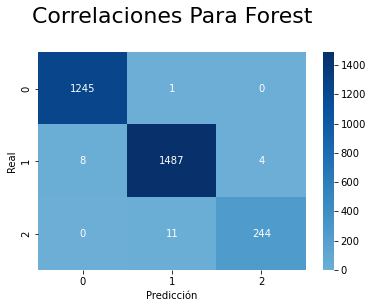

In [34]:
# Gráfico
sns.heatmap(CM, center = True, annot=True, fmt="g", cmap="Blues")
plt.title('Correlaciones Para Forest\n', fontsize = 22)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
ye = dataset["class"].values
Xis = dataset.drop(["class"], axis = 1)

Xis_train, Xis_test, ye_train, ye_test = train_test_split(Xis, ye, test_size = 0.3, random_state = 41)

In [37]:
modelo = KNeighborsClassifier(n_neighbors=4)  
modelo.fit(Xis_train, ye_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
ye_test_pred = modelo.predict(Xis_test)
test_accuracy = accuracy_score(ye_test, ye_test_pred)

print('KNN ACCURACY:',test_accuracy)

KNN ACCURACY: 0.7646666666666667


In [39]:
#Confusion Matrix
CM = confusion_matrix(ye_test, ye_test_pred)
print('Matriz de Confusión: \n\n', CM)

Matriz de Confusión: 

 [[ 990  258   23]
 [ 166 1291   27]
 [  57  175   13]]


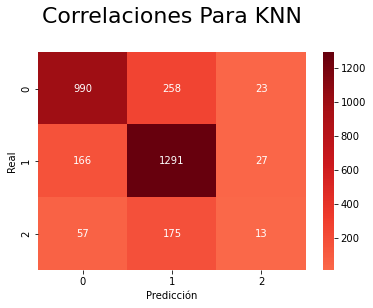

In [40]:
# Gráfico
sns.heatmap(CM, center = True, annot=True, fmt="g", cmap="Reds")
plt.title('Correlaciones Para KNN\n', fontsize = 22)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Métricas de los Modelos

In [41]:
#Recall 

from sklearn.metrics import recall_score

print(f"TREE RECALL: {recall_score(y_test, y_test_pred, average= 'micro')}")
print(f"FOREST RECALL: {recall_score(B_test, B_test_pred, average= 'micro')}")
print(f"KNN RECALL: {recall_score(ye_test, ye_test_pred, average= 'micro')}")

TREE RECALL: 0.9886666666666667
FOREST RECALL: 0.992
KNN RECALL: 0.7646666666666667


In [42]:
#F1

from sklearn.metrics import f1_score

print(f"TREE F1: {f1_score(y_test, y_test_pred, average= 'micro')}")
print(f"FOREST F1: {f1_score(B_test, B_test_pred, average= 'micro')}")
print(f"KNN F1: {f1_score(ye_test, ye_test_pred, average= 'micro')}")

TREE F1: 0.9886666666666667
FOREST F1: 0.992
KNN F1: 0.7646666666666667


Todas las métricas dan el mismo resultado (precisión también dio los mismos resultados). Grafico sólo una:

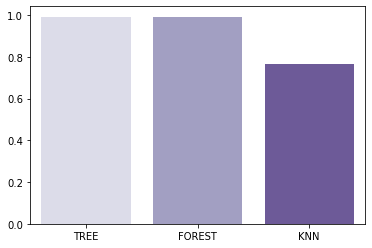

In [43]:
ax = sns.barplot(x=["TREE", "FOREST", "KNN"], y=[f1_score(y_test, y_test_pred, average= 'micro'), f1_score(B_test, B_test_pred, average= 'micro'), f1_score(ye_test, ye_test_pred, average= 'micro')], 
                 palette="Purples")

### Conclusión

En base a todas estas métricas, el modelo FOREST es el más adecuado para este problema.